In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import csv
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------

In [38]:
#Uploading the CSV Files (Need data uploaded first ya know?)
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

#What Do Both Files Look like via .describe() and .info()?
dataframe_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [39]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [40]:
dataframe_raw.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


In [41]:
#Oh my, the max numbers are roughly 16X higher for Volumetric Flow Meter I and 10X for Horse Power
dataframe_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


In [42]:
#What type of values is the data comprised of and what do the first 5 rows look like?
dataframe_stdev.info()
dataframe_stdev.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB


,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0


---------------------------------------------------------------------------

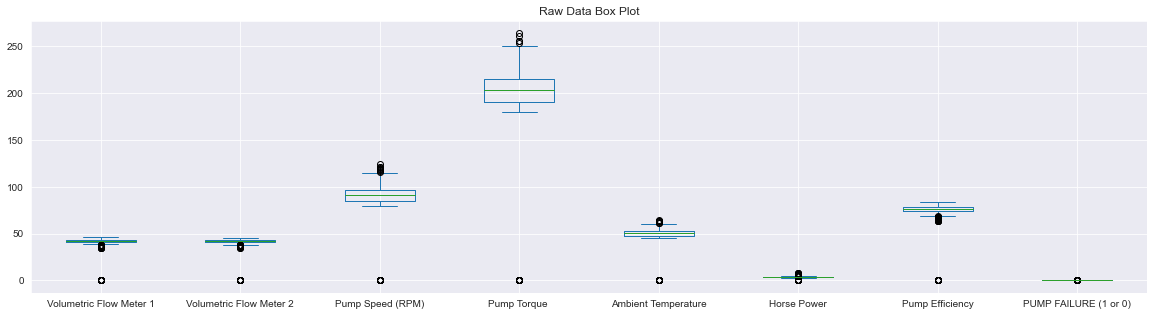

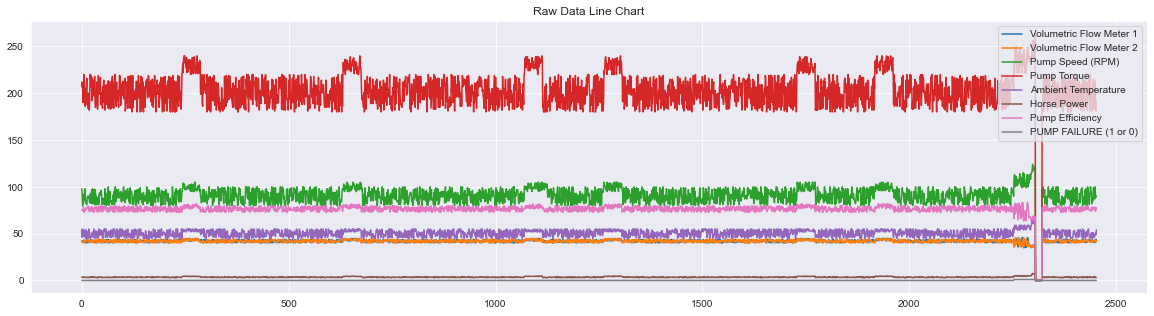

In [43]:
#Creating the Box Plot and Line Plots for both datasets [ataframe_raw & dataframe-stdev]
#RAW DATA BOX AND LINE PLOTS HERE
dataframe_raw.plot(kind='box', title='Raw Data Box Plot')
dataframe_raw.plot(kind='line', title='Raw Data Line Chart')
plt.show()

In [44]:
#RAW Data Chart Analysis

#For the Box Plot, the values differ too greatly (such as Horse Power vs. Pump Torque and it makes it hard to analyze)

#One thing to note are the outliers (circles) within the Box Plot as the Outliers 

#[small in number, less than 1% of individual data points]

#They along with using the Line Chart for reference, appear to give both rises in heartbeats

#What I'm referring to is notice within the Line chart, the bumps of all values rising look like rises in a heart beat chart?

#The six that occur before the failure, appear to be neutral and do not cause PUMP FAILURE.

#But still warrant an investigation as to not only why they are occuring and checking in with the maintenance team to answer:

#Would they reduce the duration we would have the water pumps while simulataneously not provide an appropriate

#Risk-to-reward ratio (how much water is being pumped)? 

#With that said, the variables before the Pump Failre show their own pattern before failure

#Such as Pump Speed (RPM) and Pump Torque going above the seasonal highs of the heart rate jumps before FAILURE


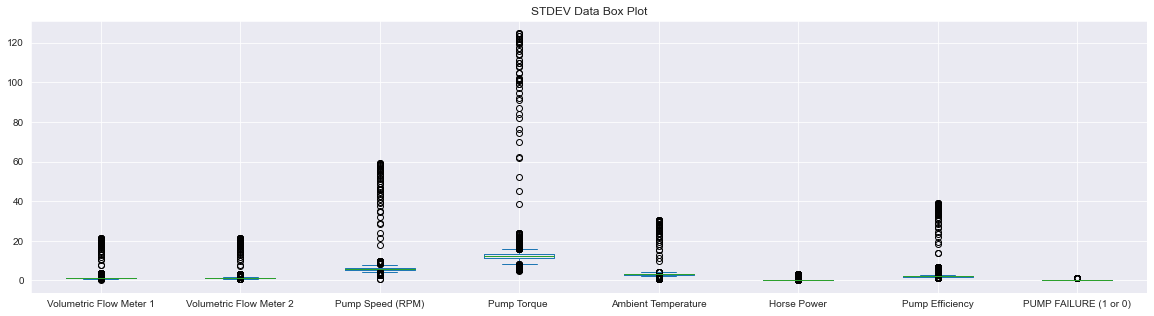

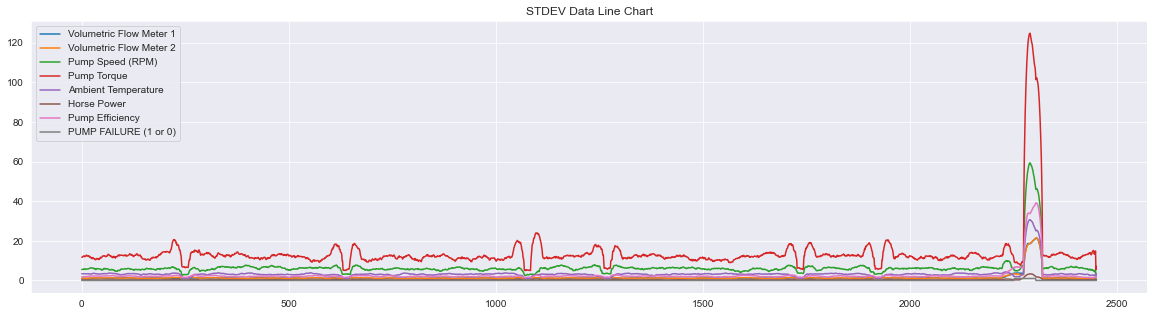

In [45]:
#STDEV DATA BOX AND LINE PLOTS HERE
dataframe_stdev.plot(kind='box', title='STDEV Data Box Plot')
dataframe_stdev.plot(kind='line', title='STDEV Data Line Chart')
plt.show()

In [46]:
#Analysis Regarding the STDEV Plot
#The Box Plot shows that the outliers much more clearly and you do not need a statistical analysis to see.

#They differ greatly from the typical ranges for each individual variable respectivly.

#Similar to the Line Plot chart, the variables show heart rate increases with the trends before PUMP FAILURE

#Showing its own distinct pattern compared to the 6 heart rate jumps.

#If you look closely, the Ambient Temperature (Lavender Color) and Volumetric Flow Meter 2 (Orange Color)

#Cross right before PUMP Failure along with Pump Speed (RPM) (Green Color) and Volumetric Flow Meter 2 crossing as well

#With this, we can create an equation that can catch those patterns and use this as possibly

#a warning indicator to shut down before PUMP Failure (possibly since this is only 1 PUMP Failure that is being analyzed)

---------------------------------------------------------------------------

---------------------------------------------------------------------------

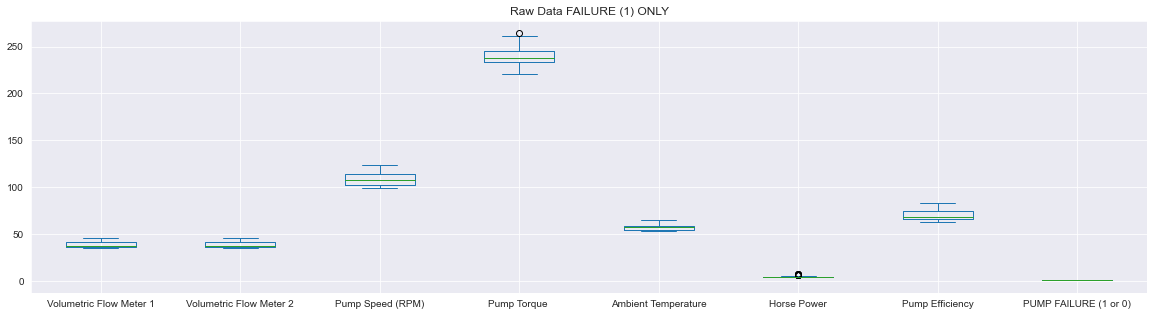

In [47]:
#Failure Raw Box Plot
Cond1 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 1
dataframe_raw_FAIL = dataframe_raw[Cond1]
dataframe_raw_FAIL.plot(kind='box')
plt.title("Raw Data FAILURE (1) ONLY")
plt.show()

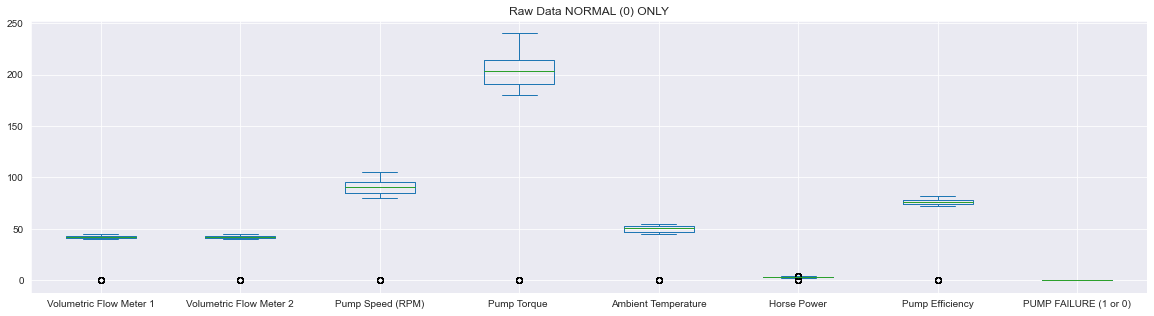

In [48]:
#Normal Raw Box Plot
Cond0 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
dataframe_raw_NORMAL = dataframe_raw[Cond0]
dataframe_raw_NORMAL.plot(kind='box')
plt.title("Raw Data NORMAL (0) ONLY")
plt.show()

In [49]:
#Analysis of the Raw Data Plots for both NORMAL AND FAILURE

#When viewing Pump Torque closely it shows that the top value for Failure (1) it has a max value that is
#higher than compared to the NORMAL (0) ONLY.

#When viewing Pump Speed (RPM), Failure's range appears to be higher than outside the 75th percentile of the 
#normal box plot when comparing the two figures closely.



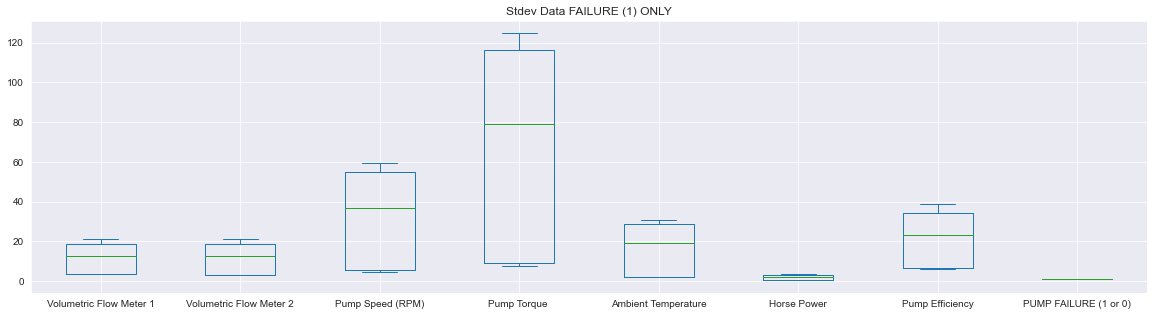

In [50]:
#Failure STDEV Box Plot
Cond1 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1
dataframe_stdev_FAIL = dataframe_stdev[Cond1]
dataframe_stdev_FAIL.plot(kind='box')
plt.title("Stdev Data FAILURE (1) ONLY")
plt.show()

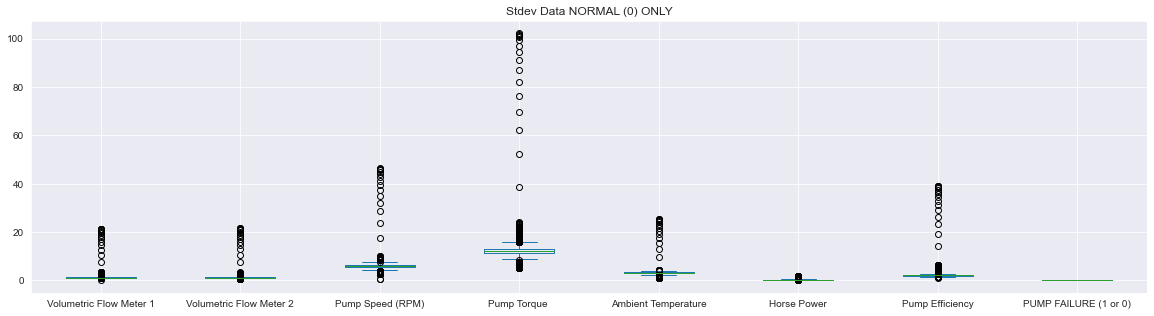

In [51]:
#Normal STDEV Box Plot
Cond0 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0
dataframe_stdev_NORMAL = dataframe_stdev[Cond0]
dataframe_stdev_NORMAL.plot(kind='box')
plt.title("Stdev Data NORMAL (0) ONLY")
plt.show()

In [52]:
#Analysis comparing the STDEV Box Plots FAILURE (1) VS. NORMAL (0)

#The STDEV gives a much greater contrast than compared to both of the Raw Data Box Plots.

#For all variables within the box plots, the outliers of Normal (0) Only appear to be the typical range of FAILURE (1) ONLY

#While this is not confirmed, this would indicate that a combination of the values:
#Pump Speed (RPM), Pump Torque, Volumetric Flow Meter 1 (& 2)

#If the STDEV's hit a certain threshold, these values can be used as triggers for warning notifications to
#shut down the pumps before they lose control.

---------------------------------------------------------------------------

In [53]:
#Creating the Percentiles for Step 5 right here so we can get the ranges and percentiles of the data.
Raw_Q1_Percentile=dataframe_raw.quantile(q=0.25, axis=0)
Raw_Q3_Percentile=dataframe_raw.quantile(q=0.75, axis=0)
Raw_IQR=Raw_Q3_Percentile-Raw_Q1_Percentile
print(Raw_IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [54]:
Raw_Lower_Range=(Raw_Q1_Percentile - 1.5*Raw_IQR)
Raw_Higher_Range=(Raw_Q3_Percentile + 1.5*Raw_IQR)
print(Raw_Lower_Range)
print(Raw_Higher_Range)
#Oops this was Step 6

Volumetric Flow Meter 1     37.915
Volumetric Flow Meter 2     37.805
Pump Speed (RPM)            67.000
Pump Torque                155.000
Ambient Temperature         40.500
Horse Power                  2.380
Pump Efficiency             68.695
PUMP FAILURE (1 or 0)        0.000
dtype: float64
Volumetric Flow Meter 1     46.275
Volumetric Flow Meter 2     46.325
Pump Speed (RPM)           115.000
Pump Torque                251.000
Ambient Temperature         60.500
Horse Power                  4.620
Pump Efficiency             84.335
PUMP FAILURE (1 or 0)        0.000
dtype: float64


---------------------------------------------------------------------------

In [55]:
# Step 6i Defining the Lower_Limit and Upper_Limit
Raw_Lower_Range=(Raw_Q1_Percentile - 1.5*Raw_IQR)
Raw_Higher_Range=(Raw_Q3_Percentile + 1.5*Raw_IQR)
print(Raw_Lower_Range)
print(Raw_Higher_Range)

Volumetric Flow Meter 1     37.915
Volumetric Flow Meter 2     37.805
Pump Speed (RPM)            67.000
Pump Torque                155.000
Ambient Temperature         40.500
Horse Power                  2.380
Pump Efficiency             68.695
PUMP FAILURE (1 or 0)        0.000
dtype: float64
Volumetric Flow Meter 1     46.275
Volumetric Flow Meter 2     46.325
Pump Speed (RPM)           115.000
Pump Torque                251.000
Ambient Temperature         60.500
Horse Power                  4.620
Pump Efficiency             84.335
PUMP FAILURE (1 or 0)        0.000
dtype: float64


In [56]:
## Step 6ii Defining Outliers
Outliers = dataframe_raw [((dataframe_raw < Raw_Lower_Range) | ((dataframe_raw > Raw_Higher_Range))).any(axis=1)]
print(Outliers)

     Data Source TIMEFRAME (DD/MM/YYYY)  Volumetric Flow Meter 1  \
248          Raw         9/12/2014 4:08                    44.61   
267          Raw         9/12/2014 4:27                    43.02   
272          Raw         9/12/2014 4:32                    43.37   
641          Raw        9/12/2014 10:41                    42.50   
655          Raw        9/12/2014 10:55                    42.90   
...          ...                    ...                      ...   
2316         Raw       10/12/2014 14:36                     0.00   
2317         Raw       10/12/2014 14:37                     0.00   
2318         Raw       10/12/2014 14:38                     0.00   
2319         Raw       10/12/2014 14:39                     0.00   
2320         Raw       10/12/2014 14:40                     0.00   

      Volumetric Flow Meter 2  Pump Speed (RPM)  Pump Torque   \
248                     42.28               103           240   
267                     44.53               102      

C:\Users\Eric\AppData\Local\Temp/ipykernel_16308/2938907605.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw [((dataframe_raw < Raw_Lower_Range) | ((dataframe_raw > Raw_Higher_Range))).any(axis=1)]


In [57]:
#Step 6 iii
print((2453 - 95)/2453)
#96.12% of the data remains based off of 95 rows being removed

0.9612719119445576


In [58]:
#When viewing the visualizations along with remembering the multi-factor regression equation that was created
#2 months ago. Yes, removing the outliers within the dataset is problematic where the outliers are associated with 
#PUMP FAILURE (=1). The objective here is to understand what causes PUMP FAILURE, but doing this right here 
#(assuming the outlierless dataset has no PUMP FAILURE) this would tell us what an acceptable range of values
#is needed within NORMAL OPERATIONS.

---------------------------------------------------------------------------

In [59]:
## Step 7i. Creating No_outliers and the ~ operator
no_outliers = dataframe_raw [ ~ (((dataframe_raw < Raw_Lower_Range) | ((dataframe_raw > Raw_Higher_Range))).any(axis=1))]
print(no_outliers)

C:\Users\Eric\AppData\Local\Temp/ipykernel_16308/2045067776.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw [ ~ (((dataframe_raw < Raw_Lower_Range) | ((dataframe_raw > Raw_Higher_Range))).any(axis=1))]


     Data Source TIMEFRAME (DD/MM/YYYY)  Volumetric Flow Meter 1  \
0            Raw         9/12/2014 0:00                    41.30   
1            Raw         9/12/2014 0:01                    42.40   
2            Raw         9/12/2014 0:02                    41.43   
3            Raw         9/12/2014 0:03                    42.21   
4            Raw         9/12/2014 0:04                    40.51   
...          ...                    ...                      ...   
2448         Raw       10/12/2014 16:48                    40.75   
2449         Raw       10/12/2014 16:49                    41.32   
2450         Raw       10/12/2014 16:50                    40.53   
2451         Raw       10/12/2014 16:51                    43.82   
2452         Raw       10/12/2014 16:52                    43.28   

      Volumetric Flow Meter 2  Pump Speed (RPM)  Pump Torque   \
0                       41.16                98           207   
1                       41.39                92      

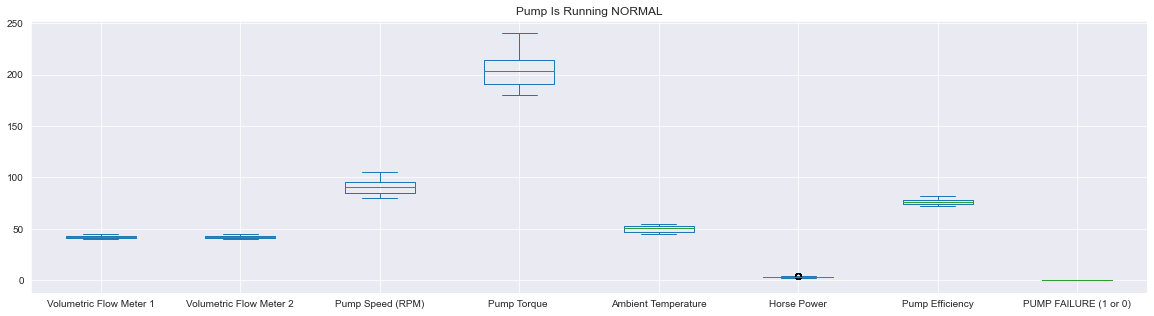

In [60]:
#Step 7 ii). Normal Condition
condition_normal= no_outliers['PUMP FAILURE (1 or 0)'] == 0
dataframe_raw_NORMAL = no_outliers[condition_normal]
dataframe_raw_NORMAL.plot(kind='box')
plt.title("Pump Is Running NORMAL")
plt.show()

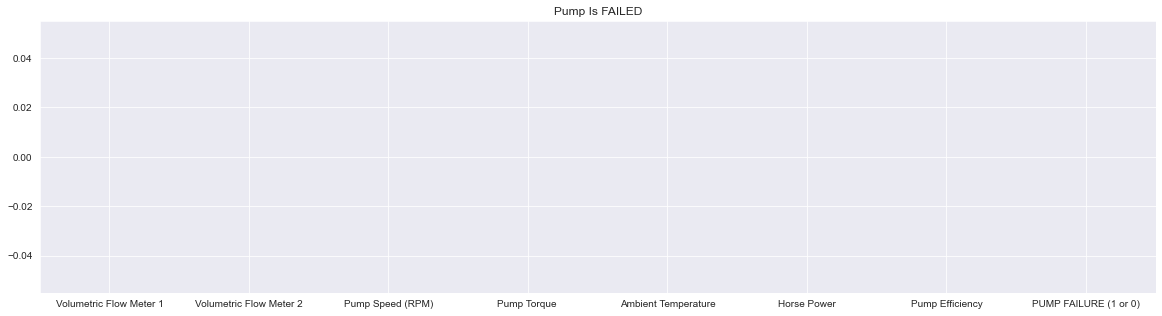

In [61]:
#Step 7 ii). FAILURE Condition
condition_normal= no_outliers['PUMP FAILURE (1 or 0)'] == 1
dataframe_raw_NORMAL = no_outliers[condition_normal]
dataframe_raw_NORMAL.plot(kind='box')
plt.title("Pump Is FAILED")
plt.show()

In [62]:
#Analysis of the plots
#This confirms that the all of the high number outliers within the Data indicates when the PUMP has failed.
#With this, we can now be sure that right around the cut-off values amongst the variables indicate 
#the outliers mean the Pump will most likely. [Most likely since this is only 1 Pump Failure and unless more time goes by,
#we do not know whether this cut-off value is an excellent predictor of failure or if this was a fluke]. 

In [63]:
# Listing all the Column Headers
with open('DF_Raw_Data.csv') as csv_headers:
    csv_reader = csv.DictReader(csv_headers)
    dict_from_csv = dict(list(csv_reader)[0])
    list_of_column_names = list(dict_from_csv.keys())
   
    ListOfVariables = ['TIMEFRAME (DD/MM/YYYY)', 'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']
print(ListOfVariables)

['TIMEFRAME (DD/MM/YYYY)', 'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']


In [64]:
print(dataframe_stdev.columns)

Index(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency',
       'PUMP FAILURE (1 or 0)'],
      dtype='object')


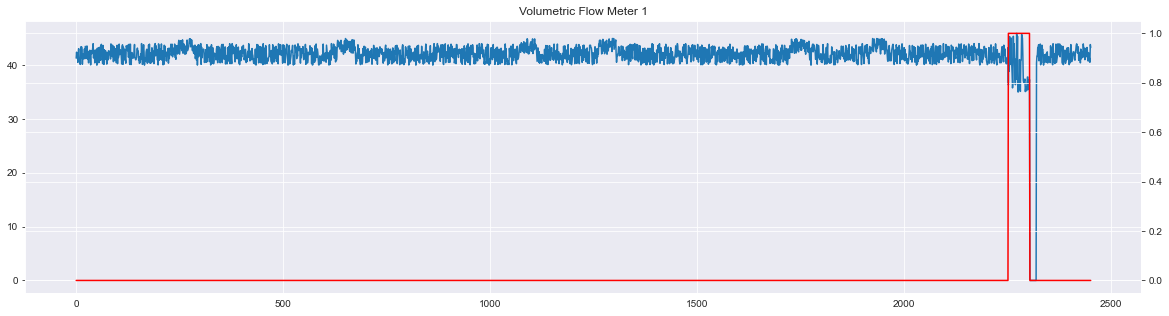

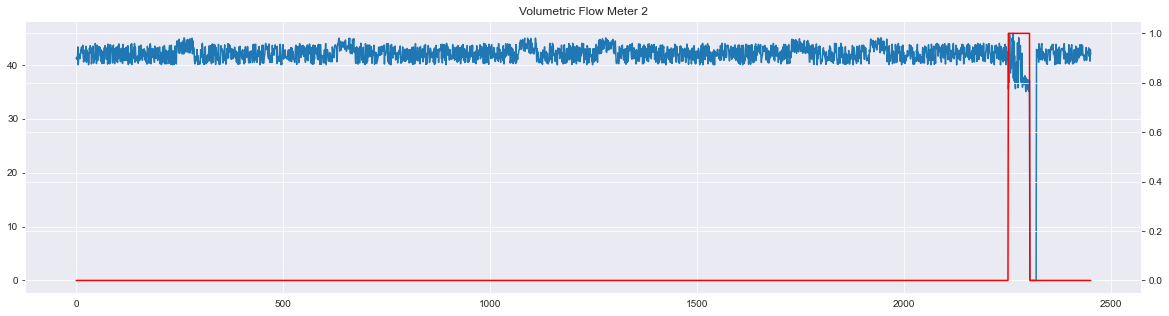

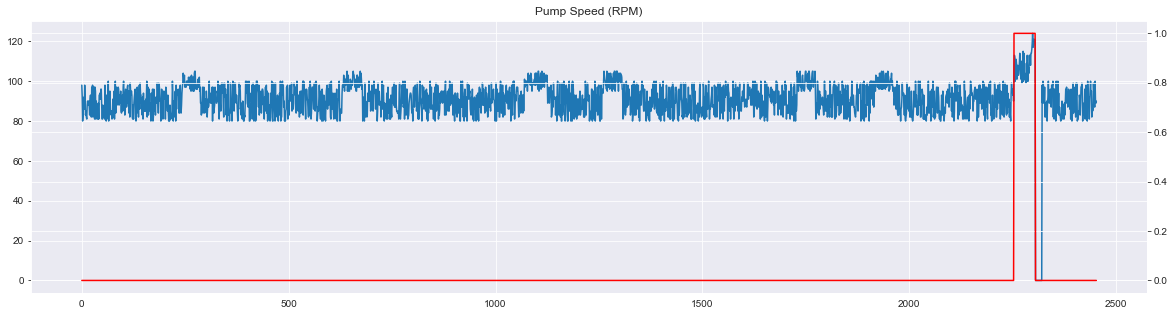

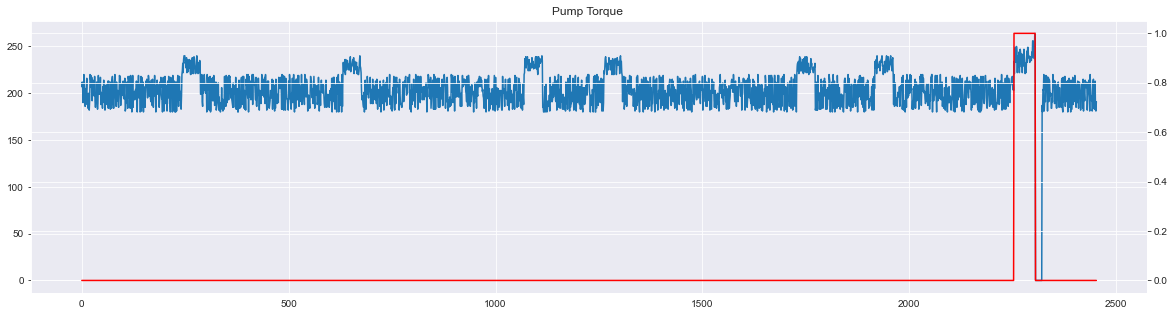

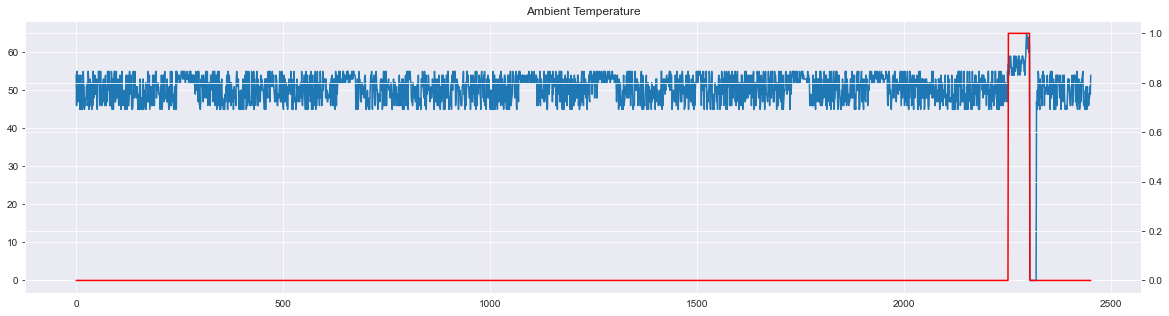

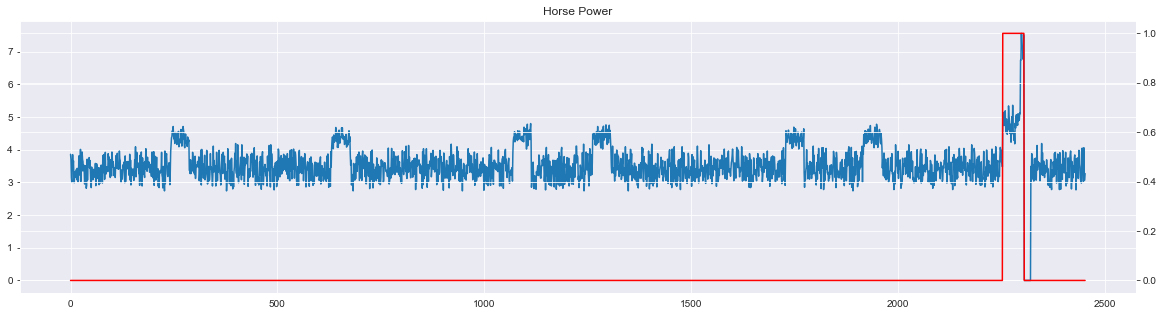

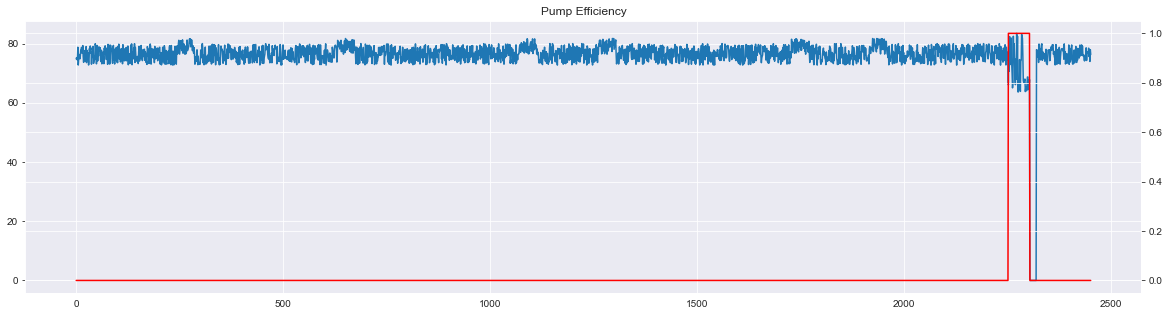

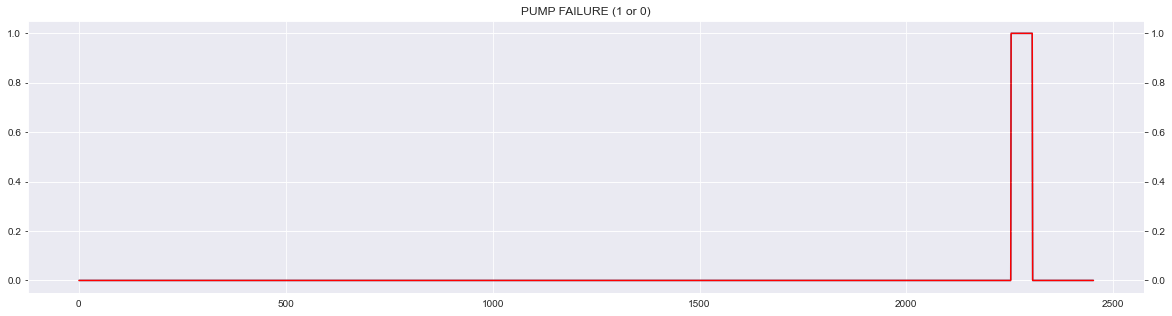

In [65]:
 ListOfVariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']

for item in ListOfVariables:
    first_axis = dataframe_raw[item].plot()
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='red')
    plt.title(item)
    plt.show()

In [69]:
correlated_df_raw = dataframe_raw.corr(method='pearson')
print(correlated_df_raw)

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
Volumetric Flow Meter 1                 1.000000                 0.893058   
Volumetric Flow Meter 2                 0.893058                 1.000000   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Horse Power                             0.470081                 0.462087   
Pump Efficiency                         0.913014                 0.980144   
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
Volumetric Flow Meter 1          0.674691      0.700425             0.713913   
Volumetric Flow Meter 2          0.671896      0.692183             0.710423   
Pump Speed (RPM)                 1.000000      0.711037           

<AxesSubplot:>

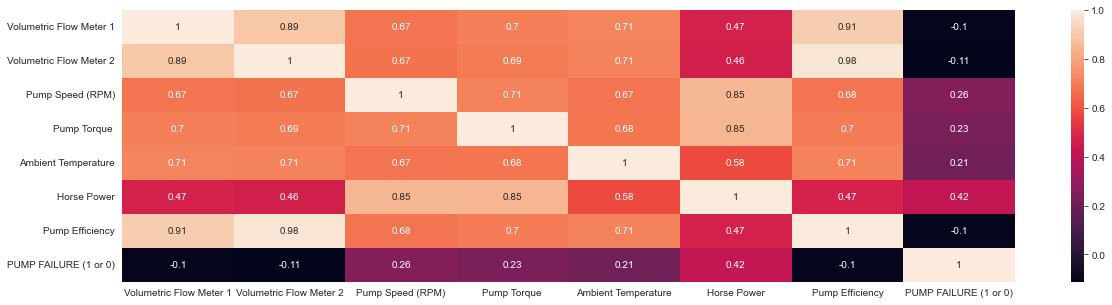

In [70]:
sns.heatmap(correlated_df_raw, annot=True)

PUMP FAILURE (1 or 0)      1.000000
Horse Power                0.421694
Pump Speed (RPM)           0.260016
Pump Torque                0.233193
Ambient Temperature        0.207946
Volumetric Flow Meter 1   -0.102508
Pump Efficiency           -0.102696
Volumetric Flow Meter 2   -0.112115
Name: PUMP FAILURE (1 or 0), dtype: float64


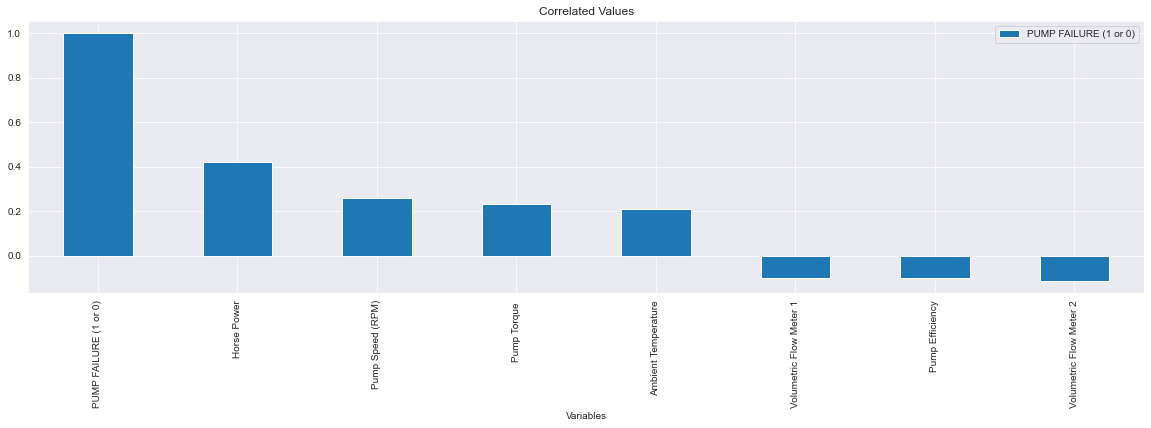

In [71]:
df_raw_corr = pd.DataFrame(correlated_df_raw)
df_raw_corr_pump_failure = df_raw_corr["PUMP FAILURE (1 or 0)"]
sorted_pump_failure = df_raw_corr_pump_failure.sort_values(ascending = False)
ax = sorted_pump_failure.plot(kind='bar', title='Correlated Values', legend=True)
ax.set_xlabel("Variables")
print(sorted_pump_failure)

PUMP FAILURE (1 or 0)      1.000000
Horse Power                0.421694
Pump Speed (RPM)           0.260016
Pump Torque                0.233193
Ambient Temperature        0.207946
Volumetric Flow Meter 1   -0.102508
Pump Efficiency           -0.102696
Volumetric Flow Meter 2   -0.112115
Name: PUMP FAILURE (1 or 0), dtype: float64


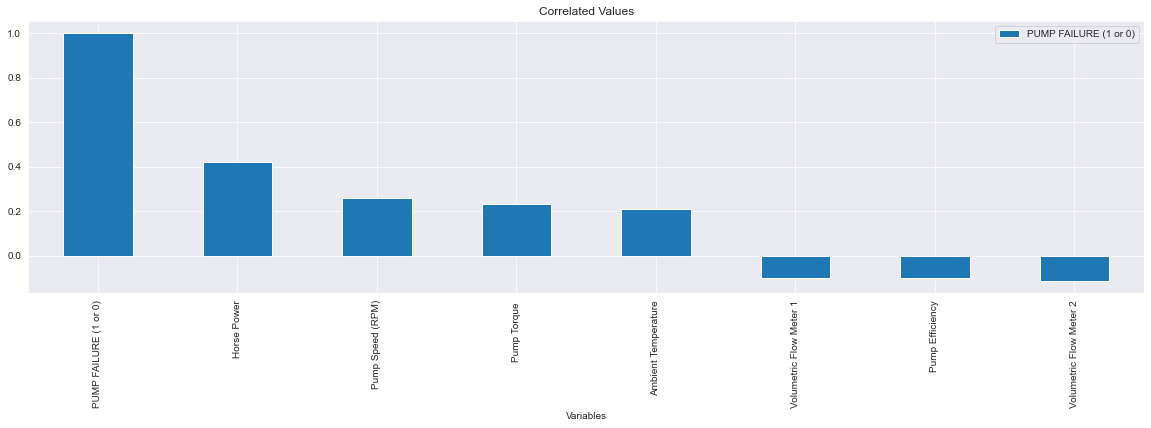

In [72]:
df_raw_corr = pd.DataFrame(correlated_df_raw)
df_raw_corr_pump_failure = df_raw_corr["PUMP FAILURE (1 or 0)"]
sorted_pump_failure = df_raw_corr_pump_failure.sort_values(ascending = False)
ax = sorted_pump_failure.plot(kind='bar', title='Correlated Values', legend=True)
ax.set_xlabel("Variables")
print(sorted_pump_failure)

---

<AxesSubplot:>

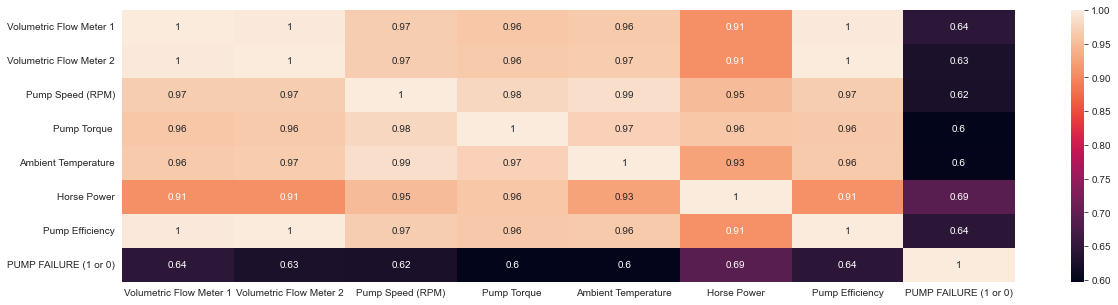

In [73]:
corr_stdev = dataframe_stdev.corr('pearson')
sns.heatmap(corr_stdev, annot=True)

In [74]:
#The variables that stand out the most is Horse Power at a correlated variable of 0.69.
#Alongside Pump Efficency at 0.64.
#There are the other variables where the correlation between Pump Efficency and Volumetric Flow is 1.
#However we want to stay focused on PUMP FAILURE (1 or 0) for the time being.

In [75]:
#Dataframe_Raw
Raw_Independent_Variables = dataframe_raw[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]
Raw_Dependent_Variables= dataframe_raw['PUMP FAILURE (1 or 0)']
Raw_Cons_Independent_Variables = sm.add_constant(Raw_Independent_Variables)
Raw_regression_model = sm.OLS(Raw_Dependent_Variables,Raw_Cons_Independent_Variables).fit()
print(Raw_regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Sat, 10 Sep 2022   Prob (F-statistic):          5.58e-233
Time:                           13:53:54   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\Eric\anaconda3.9\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
#Dataframe_Stdev
Stdev_Independent_Variables = dataframe_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]
Stdev_Dependent_Variables = dataframe_stdev['PUMP FAILURE (1 or 0)']
Stdev_Cons_Independent_Variables = sm.add_constant(Stdev_Independent_Variables)
Stdev_regression_model = sm.OLS(Stdev_Dependent_Variables,Stdev_Independent_Variables).fit()
print(Stdev_regression_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.774
Model:                               OLS   Adj. R-squared (uncentered):              0.773
Method:                    Least Squares   F-statistic:                              1195.
Date:                   Sat, 10 Sep 2022   Prob (F-statistic):                        0.00
Time:                           13:53:55   Log-Likelihood:                          3067.8
No. Observations:                   2452   AIC:                                     -6122.
Df Residuals:                       2445   BIC:                                     -6081.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

C:\Users\Eric\anaconda3.9\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Question 13 Analysis of the Raw data vs. STDEV Coefficent models

#The OLS Regression Results for the raw data indicates a value of R^2=0.362

#For the STDEV data the value is R^2=0.778

#STDEV Data regression model is a better candidate for predicting pump failure than the Raw Data

#Only thing to note, is until we test the regression model in the real world we will not know for sure

#if applying this model will reduce future Pump Failures or not.

<AxesSubplot:>

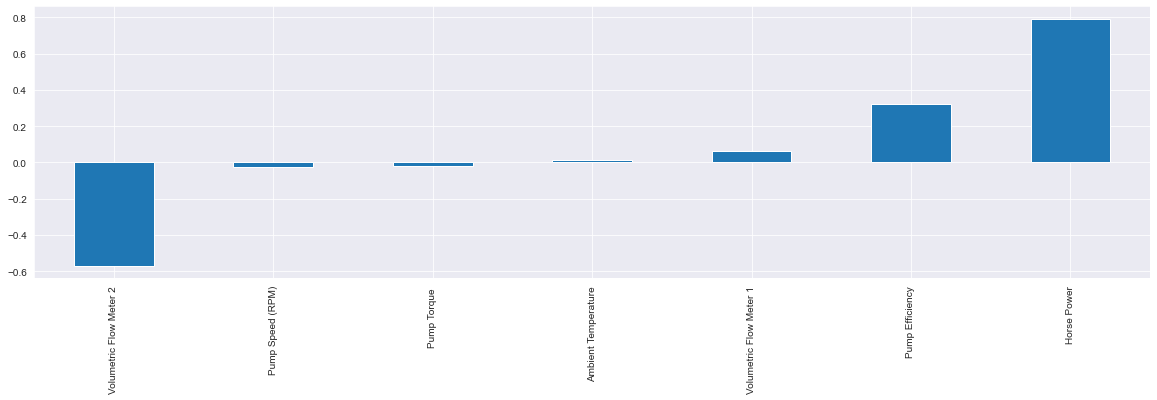

In [77]:
Parameters = Stdev_regression_model.params.sort_values()
Parameters.plot(kind='bar')

In [78]:
print(dataframe_stdev)

                    Data Source TIMEFRAME (DD/MM/YYYY)  \
0     Rolling Stdev (30 Minute)         9/12/2014 0:00   
1     Rolling Stdev (30 Minute)         9/12/2014 0:01   
2     Rolling Stdev (30 Minute)         9/12/2014 0:02   
3     Rolling Stdev (30 Minute)         9/12/2014 0:03   
4     Rolling Stdev (30 Minute)         9/12/2014 0:04   
...                         ...                    ...   
2447  Rolling Stdev (30 Minute)         9/12/2014 0:26   
2448  Rolling Stdev (30 Minute)         9/12/2014 0:27   
2449  Rolling Stdev (30 Minute)         9/12/2014 0:28   
2450  Rolling Stdev (30 Minute)         9/12/2014 0:29   
2451  Rolling Stdev (30 Minute)         9/12/2014 0:30   

      Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
0                        1.04                     0.96              5.54   
1                        1.06                     1.01              5.49   
2                        1.06                     1.03              5.62   

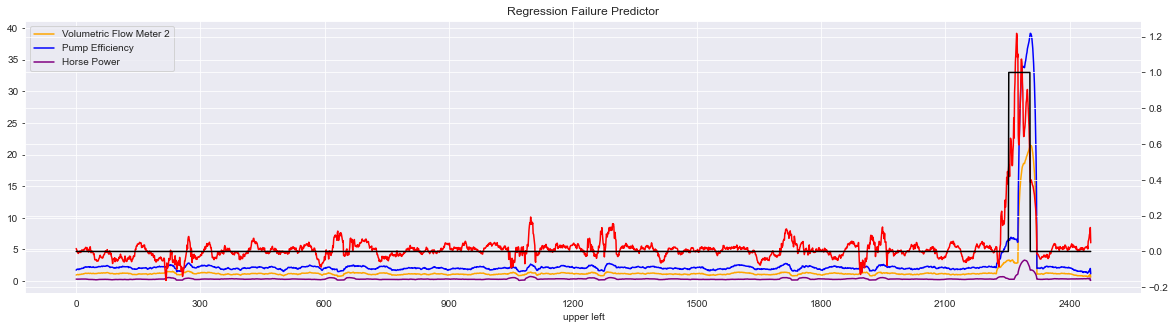

In [79]:
dataframe_stdev['Prediction'] = Stdev_regression_model.predict(Stdev_Independent_Variables)

ax1 = dataframe_stdev[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']].plot(color=('orange', 'blue', 'purple'))
ax1.set_xlabel(xlabel='upper left')
ax1.legend(loc='upper left')
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2=ax1.twinx()
ax2.plot(dataframe_stdev['Prediction'], color='red', label='Prediction')
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('Regression Failure Predictor')
plt.show()

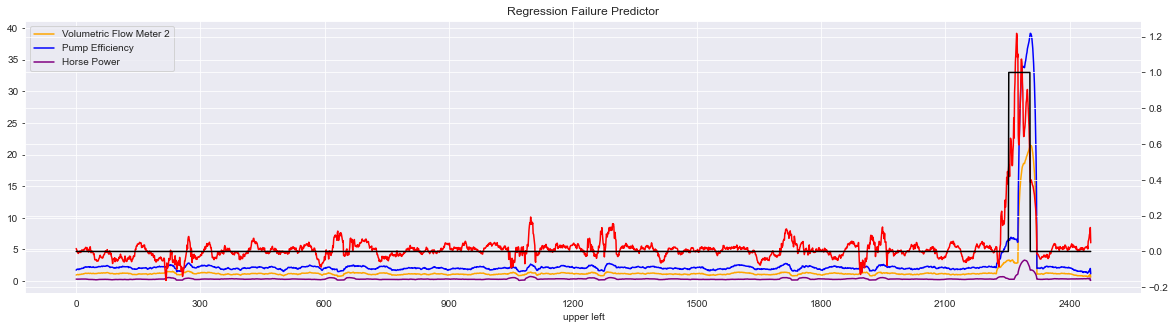

In [80]:
dataframe_stdev['Prediction'] = Stdev_regression_model.predict(Stdev_Independent_Variables)

ax1 = dataframe_stdev[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']].plot(color=('orange', 'blue', 'purple'))
ax1.set_xlabel(xlabel='upper left')
ax1.legend(loc='upper left')
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2=ax1.twinx()
ax2.plot(dataframe_stdev['Prediction'], color='red', label='Prediction')
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('Regression Failure Predictor')
plt.show()